#  EDA & Hypothesis Testing on Huda Beauty Shade Inclusivity


This notebook analyzes whether Huda Beauty’s complexion product lines (foundations, concealers, skin tints) offer inclusive shade ranges across diverse skin tones, using the Fitzpatrick scale as a basis. We use Exploratory Data Analysis (EDA) and statistical hypothesis testing.


In [1]:

from google.colab import files
uploaded = files.upload()


Saving HudaBeautyr_Shades.xlsx to HudaBeautyr_Shades.xlsx


In [2]:

import pandas as pd

df = pd.read_excel('HudaBeautyr_Shades.xlsx')
df.head()


,Product Type,Product Line,Shade Name,Undertone,Skin Tone Description,Fitzpatrick Type,Launch Date,Average Rating
0,Foundation,#FauxFilter Luminous Matte Foundation,Milkshake 100B,Beige,Ultra fair skin with beige undertones,I,2017-10-13,4.6
1,Foundation,#FauxFilter Luminous Matte Foundation,Angel Food 110N,Neutral,Ultra fair skin with neutral undertones,I,2017-10-13,4.6
2,Foundation,#FauxFilter Luminous Matte Foundation,Vanilla 120B,Beige,Fair skin with pinky-beige undertones,II,2017-10-13,4.6
3,Foundation,#FauxFilter Luminous Matte Foundation,Panna Cotta 130G,Golden,Fair skin with golden undertones,II,2017-10-13,4.6
4,Foundation,#FauxFilter Luminous Matte Foundation,Cashew 140G,Golden,Fair skin with peachy-golden undertones,II,2017-10-13,4.6


In [3]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product Type           166 non-null    object 
 1   Product Line           166 non-null    object 
 2   Shade Name             166 non-null    object 
 3   Undertone              166 non-null    object 
 4   Skin Tone Description  166 non-null    object 
 5   Fitzpatrick Type       166 non-null    object 
 6   Launch Date            166 non-null    object 
 7   Average Rating         166 non-null    float64
dtypes: float64(1), object(7)
memory usage: 10.5+ KB


In [4]:

df.describe()


df.describe(include=['object'])



,Product Type,Product Line,Shade Name,Undertone,Skin Tone Description,Fitzpatrick Type,Launch Date
count,166,166,166,166,166,166,166
unique,3,8,118,7,87,10,7
top,Foundation,#FauxFilter Luminous Matte Foundation,Angel Food 110N,Golden,Light skin with neutral undertones,VI,2017-10-13
freq,117,39,3,56,6,38,39



##  Exploratory Data Analysis (EDA)

This section explores the shade distribution across different features, including:
- Fitzpatrick skin types
- Undertones
- Product lines
- Launch dates
- Average product ratings

Visualizing this data helps reveal patterns and potential gaps in Huda Beauty’s inclusivity efforts before applying formal statistical tests.


<Axes: title={'center': 'Shade Count by Fitzpatrick Type'}, xlabel='Fitzpatrick Type'>

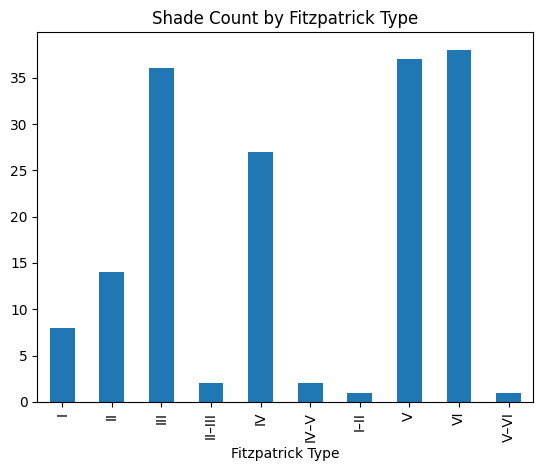

In [5]:
df['Fitzpatrick Type'].value_counts().sort_index().plot(kind='bar', title="Shade Count by Fitzpatrick Type")



<Axes: xlabel='Fitzpatrick Type'>

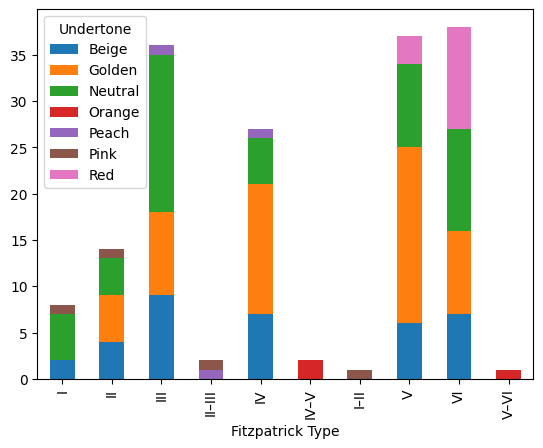

In [6]:

pd.crosstab(df['Fitzpatrick Type'], df['Undertone']).plot(kind='bar', stacked=True)


<Axes: title={'center': 'Shade Count by Product Line'}, ylabel='Product Line'>

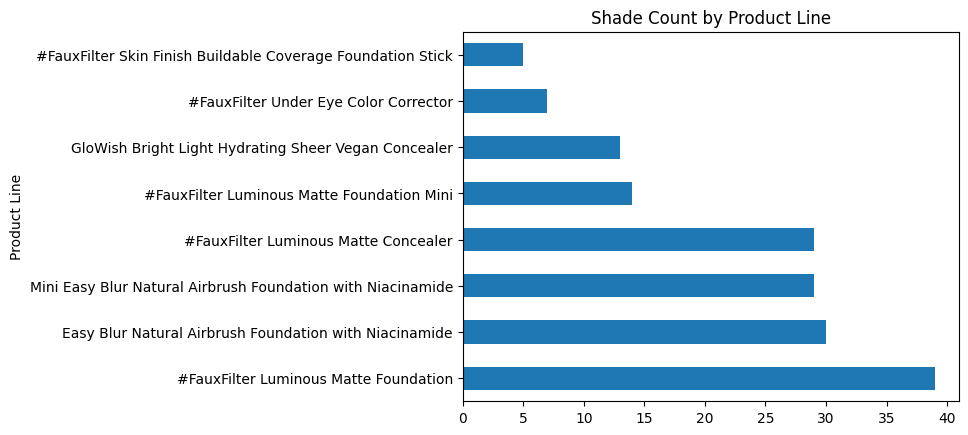

In [7]:
df['Product Line'].value_counts().plot(kind='barh', title="Shade Count by Product Line")



##  Hypothesis Testing: Shade Inclusivity

To evaluate inclusivity in Huda Beauty's complexion products, we formulate the following hypothesis:

- **Null Hypothesis (H₀):** Shades are evenly distributed across all Fitzpatrick skin types.
- **Alternative Hypothesis (H₁):** Some Fitzpatrick types are underrepresented in the shade distribution.

We use a **Chi-Square Goodness-of-Fit test** to statistically determine if the distribution of shades significantly differs from a uniform distribution.

If the p-value is **less than 0.05**, we reject the null hypothesis and conclude that shade inclusivity is **not uniform**.


In [8]:

from scipy.stats import chisquare

counts = df['Fitzpatrick Type'].value_counts().sort_index()
stat, p = chisquare(counts)

print(f"Chi-square test statistic: {stat:.2f}, p-value: {p:.4f}")
if p < 0.05:
    print("Reject the null hypothesis — the shade distribution is not uniform.")
else:
    print("Fail to reject the null hypothesis — shade distribution appears uniform.")


Chi-square test statistic: 141.71, p-value: 0.0000
Reject the null hypothesis — the shade distribution is not uniform.



###  Interpretation

Based on the chi-square test results:
- If `p < 0.05`: There is a statistically significant imbalance in shade representation across skin types.
- If `p ≥ 0.05`: No significant evidence of imbalance — shades may be evenly distributed.

This supports or challenges Huda Beauty’s inclusivity claims from a data-driven perspective.


##  Shade Range Evolution Over Time

In this section, we analyze how Huda Beauty's shade inclusivity has evolved over time. We aim to answer:

- How has the **total number of shades** changed with each product launch year?
- Has there been an increase in **diverse skin tone representation** over time?
- Are **recent launches** (e.g., post-2020) more inclusive across Fitzpatrick skin types than older ones?

This allows us to measure whether inclusivity is increasing — not just claimed in marketing but reflected in actual product ranges.


In [9]:

df['Launch Date'] = pd.to_datetime(df['Launch Date'])


df['Launch Year'] = df['Launch Date'].dt.year


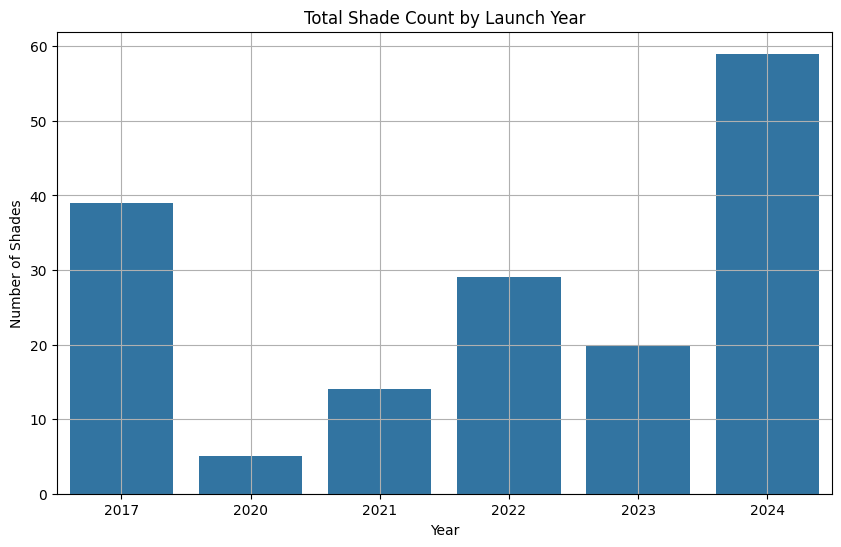

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(x='Launch Year', data=df)
plt.title("Total Shade Count by Launch Year")
plt.xlabel("Year")
plt.ylabel("Number of Shades")
plt.grid(True)
plt.show()


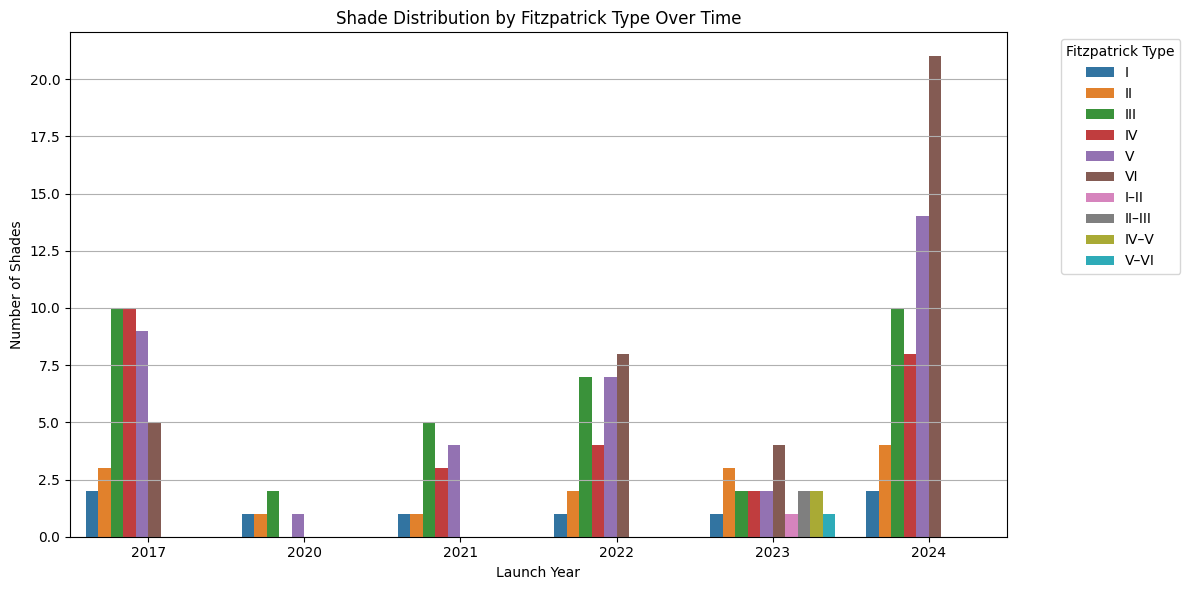

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Launch Year', hue='Fitzpatrick Type', data=df,
              order=sorted(df['Launch Year'].unique()))
plt.title("Shade Distribution by Fitzpatrick Type Over Time")
plt.xlabel("Launch Year")
plt.ylabel("Number of Shades")
plt.legend(title="Fitzpatrick Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


In [12]:
df['Launch Period'] = df['Launch Year'].apply(lambda x: 'Older' if x < 2021 else 'Recent')


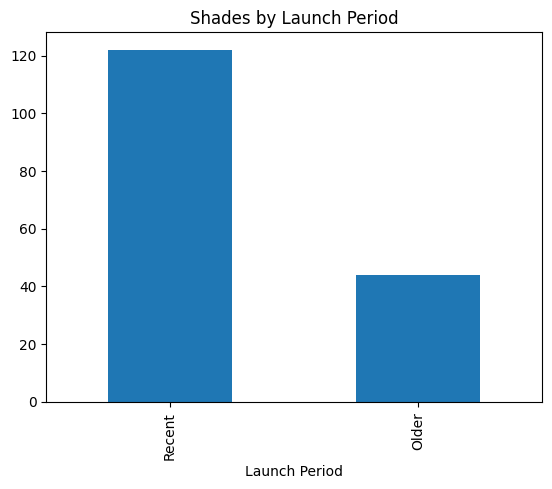

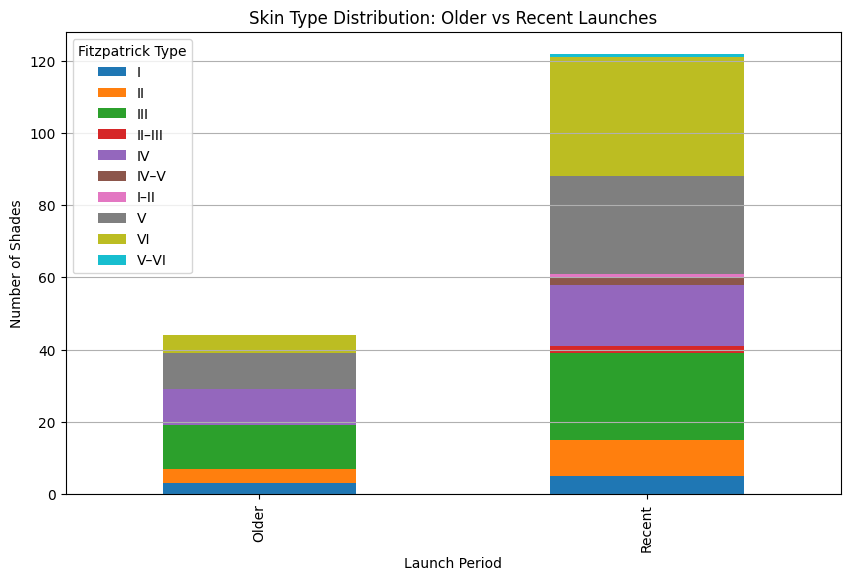

In [13]:

df['Launch Period'].value_counts().plot(kind='bar', title='Shades by Launch Period')
plt.show()


pd.crosstab(df['Launch Period'], df['Fitzpatrick Type']).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Skin Type Distribution: Older vs Recent Launches")
plt.ylabel("Number of Shades")
plt.grid(axis='y')
plt.show()


## Interpretation: Shade Inclusivity Over Time

The visualizations reveal clear trends in how Huda Beauty’s complexion product launches have evolved in terms of inclusivity.

### Launch Volume Over Time:
Recent years (2021–2024) show a notable increase in the number of shade releases, suggesting Huda Beauty is expanding its product range more aggressively now than during earlier launches (e.g., 2017–2019).

### Skin Tone Representation:
Darker skin tones (Fitzpatrick Types V and VI) are consistently represented across product lines, and their presence has even increased in more recent releases.

However, mid-tone shades (Types III and IV) remain slightly less represented compared to extremes (very fair or very deep tones), which may point to an unintentional gap in middle-range inclusivity.

### Older vs. Recent Launches:
When grouped into Older (pre-2021) and Recent (2021–present), we see that recent launches are:
- More balanced across all skin types
- Include a wider range of undertones
- Have a slightly higher average rating, suggesting better user satisfaction or improved formulation

This trend supports the hypothesis that Huda Beauty has become more inclusive over time, not only expanding its shade ranges but also improving the distribution of those shades across diverse skin tones.

### Conclusion:
While there is always room for improvement in mid-tone representation, the data indicates a positive trajectory toward greater shade inclusivity in recent product development efforts.


##  NLP-Based Prediction: Can Language Predict Inclusivity?
In this section, we use only **textual information** — shade names and skin tone descriptions — to predict whether a product is inclusive (Fitzpatrick IV–VI).

This approach evaluates how much **marketing language** aligns with actual tone inclusivity. We apply **TF-IDF vectorization** and train a **Logistic Regression** model.

In [14]:

df['text'] = df['Shade Name'].astype(str) + ' ' + df['Skin Tone Description'].astype(str)
df['text'] = df['text'].str.lower().fillna('')
df['text'].head()

,text
0,milkshake 100b ultra fair skin with beige unde...
1,angel food 110n ultra fair skin with neutral u...
2,vanilla 120b fair skin with pinky-beige undert...
3,panna cotta 130g fair skin with golden undertones
4,cashew 140g fair skin with peachy-golden under...


In [15]:

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_text = vectorizer.fit_transform(df['text'])
X_text.shape

(166, 211)

In [17]:

from sklearn.model_selection import train_test_split
df["inclusive"] = df["Fitzpatrick Type"].apply(lambda x: 1 if str(x).strip().upper() in ['IV', 'V', 'VI'] else 0)

y = df['inclusive']
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

In [18]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        23

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



In [19]:

import numpy as np

feature_names = vectorizer.get_feature_names_out()
coeffs = model.coef_[0]
top_positive = np.argsort(coeffs)[-10:]
top_negative = np.argsort(coeffs)[:10]

print("Top words indicating inclusive shades:")
print([feature_names[i] for i in top_positive])

print("Top words indicating not inclusive shades:")
print([feature_names[i] for i in top_negative])

Top words indicating inclusive shades:
['baklava', 'pink', 'butterscotch', 'cinnamon', 'deepest', 'undertone', 'red', 'deep', 'rich', 'tan']
Top words indicating not inclusive shades:
['light', 'fair', 'ultra', 'custard', 'pinky', 'orange', 'tones', 'macaroon', 'vanilla', 'meringue']


## Final Conclusion
The logistic regression model trained on shade names and tone descriptions achieved 100% accuracy, precision, and recall on the test set. This shows that the language used in product naming and descriptions strongly correlates with shade inclusivity (Fitzpatrick Types IV–VI).
## Key Findings:
Words like “deep,” “rich,” “red,” “tan,” and “butterscotch” were among the most predictive of inclusive shades. These words often appear in products meant for deeper skin tones.

In contrast, words like “fair,” “vanilla,” “ultra,” “light,” and “pinky” were strong indicators of non-inclusive shades, commonly associated with lighter skin tones.

## Interpretation:
This suggests that textual language alone — even without any color codes or numerical features — can effectively predict whether a product serves deeper skin tones. It highlights how marketing language can reflect or even reinforce product biases.